## Projeto: Exploração e visualização de dados de Empreendimentos de Geração Distribuída no Brasil. 

O objetivo deste projeto é explorar os dados sobre a geração distribuída no Brasil buscando insights sobre como, onde e por quem essa energia é gerada bem como, a potência instalada. Para esse estudo utilizaremos Python juntamente com as principais bibliotecas para análise de dados e o Jupyter Notebook para deixar o trabalho bem organizado.

<u>Uma breve introdução sobre a geração distribuída</u>: Desde 17 de abril de 2012, quando entrou em vigor a Resolução Normativa ANEEL nº 482/2012, o consumidor brasileiro pode gerar sua própria energia elétrica a partir de fontes renováveis ou cogeração qualificada e inclusive fornecer o excedente para a rede de distribuição de sua localidade. Trata-se da micro e da minigeração distribuídas de energia elétrica, inovações que podem aliar economia financeira, consciência socioambiental e autossustentabilidade.

Segundo as novas regras, que começaram a valer em 1º de março de 2016, é permitido o uso de qualquer fonte renovável, além da cogeração qualificada, denominando-se microgeração distribuída a central geradora com potência instalada até 75 quilowatts (KW) e minigeração distribuída aquela com potência acima de 75 kW e menor ou igual a 5 MW, conectadas na rede de distribuição por meio de instalações de unidades consumidoras.

Fonte: https://www.aneel.gov.br/geracao-distribuida <br>

Autor: Charles Corrêa <br>
Contato: charlesccorrea@gmail.com <br>
Linkedin: www.linkedin.com/in/charlesccorrea

## Um pouco sobre os dados.

Para que possamos analisar os dados precisamos saber como estes estão dispostos. Segue abaixo um dicionário dos dados com os quais vamos trabalhar.

<u>IdeEmpGeracaoDistribuida</u>: Identificador único da tabela Empreendimento de Geração Distribuída.

<u>IdeDistribuidora</u>: Identificador do Agente de distribuição ao qual está vinculada a unidade consumidora.

<u>NomDistribuidora</u>: Nome do agente empreendimento, formado pelas iniciais, unidade da federação e número identificador.

<u>CodEmpGeracaoDistribuida</u>: Código único de Geração Distribuída, criado para identificar única e inequivocamente o empreendimento de Geração Distribuída de energia elétrica.

<u>CodNucleoGD</u>: Núcleo numérico isolado do Código de Geração Distribuída, para fins de consulta rápida em ferramentas de pesquisa.

<u>DscClasseFornecimento</u>: Descrição dos diferentes tipos de classes de fornecimento disponíveis em: Comercial, Iluminação pública, Industrial, Poder Público, Residencial, Rural, Serviço Público.

<u>DscGrupoFornecimento</u>: Descrição dos diferentes tipos de grupos de fornecimento disponíveis em:

    Alta Tensão = 88 kV ou mais
    Média Tensão = 2,3 kV até 69 kV
    Tarifação binômia, consumo (kWh) e demanda (kW)
        A1 - 230 kV ou mais
        A2 - 88 kV a 138 kV
        A3 - 69 kV
        A3a - 30 kV a 44 kV
        A4 - 2,3 kV a 25 kV
        AS - Baixa Tensão (enquadramento tarifário)
    Grupo B (Baixa Tensão - inferior aos 2.300 Volts)
    Tarifação monômia, consumo (kWh)
        B1 - Residencial
        B2 - Rural
        B3 - Demais Classes
        B4 - Iluminação Pública

<u>NomPessoaTitular</u>: Nome do titular do empreendimento de geração.

<u>DatSituacao</u>: Data da última atualização cadastral do empreendimento de distribuição.

<u>SigTipoUC</u>: Sigla do tipo de energia do empreendimento de geração. Classificado em:

    Tipos de Usinas: 
        UHE - Usinas Hidrelétricas 
        UTE - Usinas Termelétricas 
        PCH - Pequenas Centrais Hidrelétricas 
        EOL - Usinas Eolioelétricas 
        UTN - Usinas Termonucleares 
        SOL - Fontes Alternativas de Energia 
        CGH - Central Geradora Hidrelétrica

<u>MdaPotenciaInstaladaKW</u>: Armazena os dados expressos em quantidades e potência instalada em kW (quilowatt), definida pela somatória das potências elétricas ativas nominais dos módulos da central de geração distribuída.

<u>DscCombustivel</u>: Descrição da fonte de combustível para a geração de energia.

<u>NomMunicipio</u>: Nome do município de instalação do empreendimento de distribuição.

<u>SigUF</u>: Sigla da unidade federativa de instalação do empreendimento de distribuição.

<u>QtdUCResponsavel</u>: Quantidade de responsáveis pelo empreendimento de distribuição.

<u>DscModalidadeConsumo</u>: Modalidade ao qual o empreendimento de geração está habilitado, classificado em:
    
    Autoconsumo Remoto, 
    Geração na Própria UC, 
    Geração em Condomínio.
    
<u>DscSituacaoUC</u>: Descrição da situação estrutural do empreendimento de geração, classificado em: Completo, Incompleto e Excluído.

<u>DatConexao</u>: Data da última atualização cadastral do empreendimento de distribuição.

<u>DthProcessamento</u>: Data e hora do processamento de carga automático.

Fonte dos dados: https://dados.gov.br/dataset/geracao-distribuida-relacao-empreendimentos


In [1]:
# Importando as bibliotecas.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import chardet
import folium 
from folium import plugins

# Ignorando warnings.
warnings.filterwarnings('ignore')

# Para exibir os gráficos dentro da célula do Jupyter.
%matplotlib inline

In [2]:
# Exibindo a versão dos pacotes utilizados para que possam instalá-los, caso queiram executar esse Jupyter Notebook na máquina de vocês.

%reload_ext watermark
%watermark --iversions

seaborn   : 0.11.1
folium    : 0.12.1
matplotlib: 3.3.4
pandas    : 1.2.4
chardet   : 4.0.0
numpy     : 1.19.5



In [3]:
# Detectando o charset do dataset lendo apenas uma fração dos dados.
# As vezes o conjunto de dados vem com um encoding e alguns caracteres podem eventualmente não ser exibidos corretamente.
# Para evitarmos esse tipo de problema, podemos utilizar o pacote chardet para descobrir o encoding dos dados.

with open('EmpGeracaoDistribuida.json', 'rb') as f:
    data = f.read(500000)
    ds_encoding = chardet.detect(data).get('encoding')

print('Encoding:', ds_encoding)

Encoding: ISO-8859-1


In [4]:
# Carregando os dados já passando o encoding retornado na célula acima.
# Os dados foram baixados no formato json.

dfGeracao = pd.read_json('EmpGeracaoDistribuida.json', encoding = ds_encoding)

In [5]:
# Visualizando o tamanho do dataset.

dfGeracao.shape

(319491, 19)

Temos então um dataframe do pandas com 319491 e 19 colunas.

In [6]:
# Visualizando algumas observações (registros) do dataset.

dfGeracao.head(2)

,nomMunicipio,codEmpGeracaoDistribuida,nomPessoaTitular,ideEmpGeracaoDistribuida,mdaPotenciaInstaladaKW,ideDistribuidora,dthProcessamento,dscCombustivel,dscGrupoFornecimento,sigTipoUC,dscModalidadeConsumo,codNucleoGD,dscClasseFornecimento,sigUF,dscSituacaoUC,qtdUCResponsavel,datSituacao,datConexao,nomDistribuidora
0,Porto Alegre,GD.RS.000.056.189,JOAO EDUARDO DA SILVA FONTANA,1,2.6,4273,24/10/2020 00:00:00,Radiação solar,B1,UFV,Geração na Própria UC,56189,Residencial,RS,Completa,1,07/02/2019,15/10/2018,COMPANHIA ESTADUAL DE DISTRIBUIÇÃO DE ENERGIA ...
1,Porto Alegre,GD.RS.000.192.966,SANDRA DE LOURDES TROMBETTA SILVA,2,3.0,4273,24/10/2020 00:00:00,Radiação solar,B1,UFV,Geração na Própria UC,192966,Residencial,RS,Completa,1,02/03/2020,03/02/2020,COMPANHIA ESTADUAL DE DISTRIBUIÇÃO DE ENERGIA ...


Podemos observar que temos no dataset algumas colunas que não são importantes para uma análise de dados, neste caso. 
Geralmente são colunas contendo ids, códigos e nomes. 
Portanto, para manter o dataset menor vamos remover algumas colunas com as quais não iremos trabalhar. São elas:
codEmpGeracaoDistribuida, nomPessoaTitular, ideEmpGeracaoDistribuida, ideDistribuidora, dthProcessamento, codNucleoGD e datSituacao.

In [7]:
# Removendo as colunas que não serão utilizadas.

colRemover = ['codEmpGeracaoDistribuida', 'nomPessoaTitular', 'ideEmpGeracaoDistribuida', 'ideDistribuidora', 'dthProcessamento', 'codNucleoGD', 'datSituacao']
dfGeracao.drop(colRemover, axis = 1, inplace = True)
dfGeracao.head(2)

,nomMunicipio,mdaPotenciaInstaladaKW,dscCombustivel,dscGrupoFornecimento,sigTipoUC,dscModalidadeConsumo,dscClasseFornecimento,sigUF,dscSituacaoUC,qtdUCResponsavel,datConexao,nomDistribuidora
0,Porto Alegre,2.6,Radiação solar,B1,UFV,Geração na Própria UC,Residencial,RS,Completa,1,15/10/2018,COMPANHIA ESTADUAL DE DISTRIBUIÇÃO DE ENERGIA ...
1,Porto Alegre,3.0,Radiação solar,B1,UFV,Geração na Própria UC,Residencial,RS,Completa,1,03/02/2020,COMPANHIA ESTADUAL DE DISTRIBUIÇÃO DE ENERGIA ...


In [8]:
# Verificando algumas informações sobre os dados.

dfGeracao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319491 entries, 0 to 319490
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   nomMunicipio            319491 non-null  object 
 1   mdaPotenciaInstaladaKW  319491 non-null  float64
 2   dscCombustivel          319491 non-null  object 
 3   dscGrupoFornecimento    319491 non-null  object 
 4   sigTipoUC               319491 non-null  object 
 5   dscModalidadeConsumo    319491 non-null  object 
 6   dscClasseFornecimento   319491 non-null  object 
 7   sigUF                   319491 non-null  object 
 8   dscSituacaoUC           319491 non-null  object 
 9   qtdUCResponsavel        319491 non-null  int64  
 10  datConexao              319491 non-null  object 
 11  nomDistribuidora        319491 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 29.3+ MB


Pelo resumo, observamos que a maioria das colunas foi importada para o pandas como do tipo object. 
Podemos verificar também nesse resumo que, não temos valores nulos em nenhuma das colunas. 
Apenas 2 colunas foram reconhecidas como valores numéricos e tipadas como float64 e int64, são elas 'mdaPotenciaInstaladaKW' e 'qtdUCResponsavel', respectivamente.
Portanto, para estas colunas o pandas pode nos mostrar um resumo estatístico.

In [9]:
# Resumo estatístico do dataframe.

dfGeracao.describe()

,mdaPotenciaInstaladaKW,qtdUCResponsavel
count,319491.000000,319491.000000
mean,12.875022,1.314056
std,62.364775,11.608577
min,0.000000,1.000000
25%,3.000000,1.000000
50%,5.000000,1.000000
75%,10.000000,1.000000
max,5000.000000,3261.000000


Para ambas colunas 'mdaPotenciaInstaladaKW' e 'qtdUCResponsavel' temos um desvio padrão muito alto em relação à média. Isto indica que os pontos estão espalhados, longe da média.

In [10]:
# Criando um sumário estatístico para todas as variáveis.

sumario = pd.DataFrame(index = dfGeracao.columns)
sumario['Tipo de dado'] = dfGeracao.dtypes.values
sumario['# valores únicos'] = dfGeracao.nunique().values

In [11]:
# Adicionando uma coluna com os valores mais comuns.

colunas = ['nomMunicipio', 'mdaPotenciaInstaladaKW', 'dscCombustivel', 'dscGrupoFornecimento', 'sigTipoUC', 'dscModalidadeConsumo', 
           'dscClasseFornecimento', 'sigUF', 'dscSituacaoUC', 'qtdUCResponsavel', 'datConexao', 'nomDistribuidora']
temp = []

for col in colunas:
    temp.append(dfGeracao[col].value_counts().idxmax())
    
sumario['Mais coumns'] = temp
sumario

,Tipo de dado,# valores únicos,Mais coumns
nomMunicipio,object,4848,Rio de Janeiro
mdaPotenciaInstaladaKW,float64,3536,5.0
dscCombustivel,object,14,Radiação solar
dscGrupoFornecimento,object,10,B1
sigTipoUC,object,4,UFV
dscModalidadeConsumo,object,3,Geração na Própria UC
dscClasseFornecimento,object,7,Residencial
sigUF,object,27,MG
dscSituacaoUC,object,6,Completa
qtdUCResponsavel,int64,85,1


In [12]:
%%time
# Tranformando a coluna 'datConexao' em datetime. (Leva alguns segundos para executar +- 20 segundos.)

dfGeracao['datConexao'] = dfGeracao['datConexao'].apply(pd.to_datetime)

Wall time: 23.5 s


In [13]:
# Criando uma nova coluna 'anoConexao' para guardar apenas o ano da conexão com o sistema de distribuição.

dfGeracao['anoConexao'] = dfGeracao['datConexao'].dt.year
dfGeracao.head(2)

,nomMunicipio,mdaPotenciaInstaladaKW,dscCombustivel,dscGrupoFornecimento,sigTipoUC,dscModalidadeConsumo,dscClasseFornecimento,sigUF,dscSituacaoUC,qtdUCResponsavel,datConexao,nomDistribuidora,anoConexao
0,Porto Alegre,2.6,Radiação solar,B1,UFV,Geração na Própria UC,Residencial,RS,Completa,1,2018-10-15,COMPANHIA ESTADUAL DE DISTRIBUIÇÃO DE ENERGIA ...,2018
1,Porto Alegre,3.0,Radiação solar,B1,UFV,Geração na Própria UC,Residencial,RS,Completa,1,2020-03-02,COMPANHIA ESTADUAL DE DISTRIBUIÇÃO DE ENERGIA ...,2020


### Análise exploratória

### Vamos analisar algumas das variáveis que compôe o dataset.

In [14]:
# Funcao para criar uma tabela com os totais por valores unicos (Apenas para facilitar a vida).

def TabelaValores(coluna):
    tbl = dfGeracao[coluna].value_counts().rename_axis(coluna).reset_index(name = 'Total')
    tbl.set_index(coluna, inplace = True)
    return tbl

In [15]:
# Variável anoConexao
# Exibindo os 5 anos com mais empreendimentos gerados.

tabela = TabelaValores('anoConexao')
tabela[:5]

,Total
anoConexao,
2020,138123
2019,122096
2018,36221
2017,14179
2016,6916


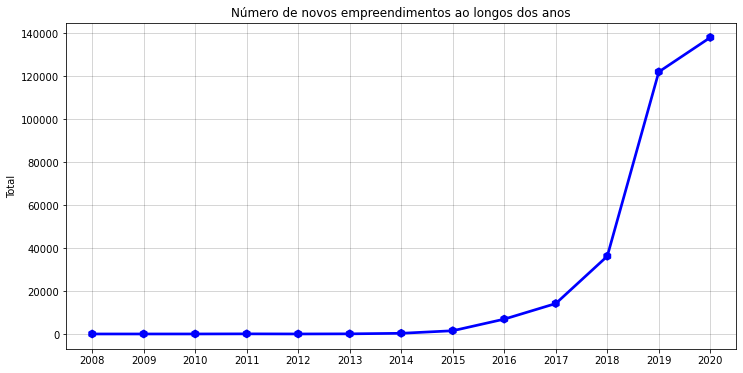

In [16]:
# Vamos acompanhar o crescimento do número de novos empreendimentos de geração distribuída ao longo dos anos. 

fig = plt.figure(figsize = (12, 6))
ax = sns.pointplot(x = tabela.index, y = tabela['Total'], color = 'blue', markers = 'h')
ax.set_facecolor('White')
plt.grid(True, alpha = 0.2, color = 'Black')
plt.ylabel('Total')
plt.xlabel('')
plt.title('Número de novos empreendimentos ao longos dos anos', color = 'black')
plt.show()

Podemos perceber que no ano de 2019 houve um salto no número de novos empreendimentos de geração distribuída. O gráfico mostra uma tendência de aumento a cada ano.

In [17]:
# Variável nomMunicipio
# Gerando um dataframe com a cidade, o numero de empreendimentos e a potência instalada.

dfMun = dfGeracao['nomMunicipio'].value_counts().rename_axis('nomMunicipio').reset_index(name = 'NumEmpGeracao').set_index('nomMunicipio')
dfMun['PotenciaInstaladakw'] = dfGeracao.groupby(['nomMunicipio'])['mdaPotenciaInstaladaKW'].sum()
dfMun.reset_index(inplace = True)
dfMun.sort_values('NumEmpGeracao', ascending = False)[:5]

,nomMunicipio,NumEmpGeracao,PotenciaInstaladakw
0,Rio de Janeiro,4047,43636.72
1,Teresina,3428,39004.50
2,Cuiabá,3326,43509.54
3,Uberlândia,3040,48975.64
4,Fortaleza,2659,37219.19


Nota-se que apesar de um número de empreendimentos maior, o Rio de Janeiro não tem a maior pontência instalada. Vamos 

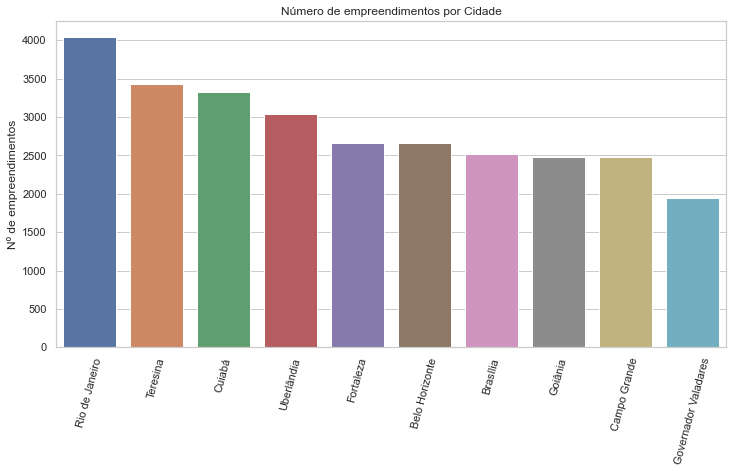

In [18]:
# Plotando um gráfico com Número de empreendimentos de geração distribuída por município (apenas os 10 primeiros).

sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (12, 6))
ax = sns.countplot(x = 'nomMunicipio', data = dfGeracao, order = dfGeracao['nomMunicipio'].value_counts().iloc[:10].index)
ax.tick_params(axis = 'x', rotation = 75)
plt.title('Número de empreendimentos por Cidade')
plt.ylabel('Nº de empreendimentos')
plt.xlabel('')
plt.show()

In [19]:
# Variável dscCombustivel
# Exibindo os 5 tipos de combustível mais utilizados.

tabela = TabelaValores('dscCombustivel')
tabela[:5]

,Total
dscCombustivel,
Radiação solar,318990
Biogás - RA,157
Potencial hidráulico,129
Cinética do vento,95
Biogás - RU,46


Percebe-se que quase a totalidade da geração utiliza a Radiação solar como fonte.

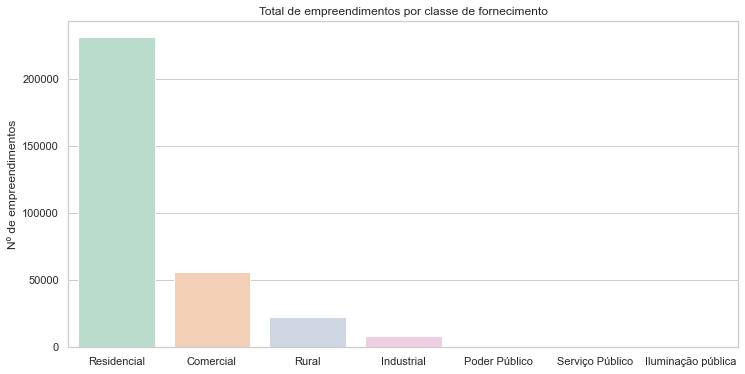

In [20]:
# Plotando um countplot com os totais por classe de fornecimento.

plt.figure(figsize = (12, 6))
plt.title('Total de empreendimentos por classe de fornecimento')
ax = sns.countplot(x = 'dscClasseFornecimento', data = dfGeracao, order = dfGeracao['dscClasseFornecimento'].value_counts().index, palette = 'Pastel2')
plt.xlabel('')
plt.ylabel('Nº de empreendimentos')
plt.show()

Nota-se aqui que a grande maioria da geração é da classe Residencial.

In [21]:
# Verificamos se o potência instalada acompanha o total por classe de fornedimento.

dfGrupo = dfGeracao.groupby(['dscClasseFornecimento'])['mdaPotenciaInstaladaKW'].sum().reset_index()
dfGrupo.sort_values('mdaPotenciaInstaladaKW', ascending = False)

,dscClasseFornecimento,mdaPotenciaInstaladaKW
0,Comercial,1624971.53
4,Residencial,1466221.59
5,Rural,553831.58
2,Industrial,416566.67
3,Poder Público,46902.66
6,Serviço Público,4243.09
1,Iluminação pública,716.46


Podemos verificar que, apesar do número bem maior de empreendimentos geradores da classe 'Residencial', o potência instalada é maior para a classe 'Comercial'. Talvez porque a demanda de um comércio seja maior que de uma residência.

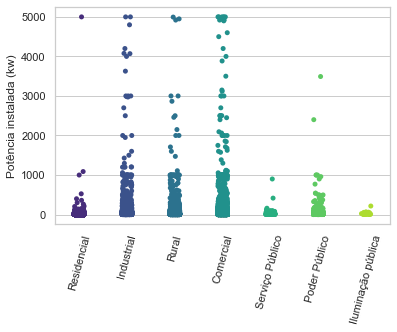

In [22]:
# Vamos observar a distribuição do potência instalada dentre as classes de fornecimento.

ax = sns.stripplot(x = 'dscClasseFornecimento', y = 'mdaPotenciaInstaladaKW', data = dfGeracao, jitter = True, dodge = True, palette = 'viridis')
ax.tick_params(axis = 'x', rotation = 75)
plt.xlabel('')
plt.ylabel('Potência instalada (kw)')
plt.show()

Percebe-se aqui que a grande maioria dos empreendimentos tem potência instalada menor que 1000 kw. No caso dos residenciais, menos de 500 kw. Podemos perceber também a presença de um registro que aprarentemente, é um outlier dado a geração de mais de 5000 kw.

Daqui em diante vamos analisar apenas os empreendimentos com Radiação solar como fonte da geração e iremos remover os empreendimentos cuja situação esteja completa.

In [23]:
# Filtrando o dataset pela situação da UC e tipo de combustível.
# Serão filtrados mais ou menos 3000 registros.

dfConcluido = dfGeracao[(dfGeracao['dscSituacaoUC'] == 'Completa') & (dfGeracao['dscCombustivel'] == 'Radiação solar')]

In [24]:
print('Tamanho do dataset filtrado:', dfConcluido.shape)

Tamanho do dataset filtrado: (316510, 13)


### Exibindo o mapa com a potência instalada.

In [25]:
# Vamos carregar os dados de geolocalização.

dfGeo = pd.read_csv('estados.csv')
dfGeo.head(2)

,codigo_uf,uf,nome,latitude,longitude
0,11,RO,Rondônia,-10.83,-63.34
1,12,AC,Acre,-8.77,-70.55


In [26]:
# Renomeando as colunas para ficarem iguais aos do dataset de geração.

dfGeo.rename({'uf': 'sigUF'}, axis = 1, inplace = True)

In [27]:
# Removendo colunas desnecessárias.

dfGeo.drop(['codigo_uf', 'nome'], axis = 1, inplace = True)
dfGeo.head()

,sigUF,latitude,longitude
0,RO,-10.83,-63.34
1,AC,-8.77,-70.55
2,AM,-3.47,-65.10
3,RR,1.99,-61.33
4,PA,-3.79,-52.48


In [28]:
# Fazendo o merge dos dataframes dfConcluido e geo

dfMapa = pd.merge(dfConcluido, dfGeo, on = ['sigUF'])
dfMapa.head(2)

,nomMunicipio,mdaPotenciaInstaladaKW,dscCombustivel,dscGrupoFornecimento,sigTipoUC,dscModalidadeConsumo,dscClasseFornecimento,sigUF,dscSituacaoUC,qtdUCResponsavel,datConexao,nomDistribuidora,anoConexao,latitude,longitude
0,Porto Alegre,2.6,Radiação solar,B1,UFV,Geração na Própria UC,Residencial,RS,Completa,1,2018-10-15,COMPANHIA ESTADUAL DE DISTRIBUIÇÃO DE ENERGIA ...,2018,-30.17,-53.5
1,Porto Alegre,3.0,Radiação solar,B1,UFV,Geração na Própria UC,Residencial,RS,Completa,1,2020-03-02,COMPANHIA ESTADUAL DE DISTRIBUIÇÃO DE ENERGIA ...,2020,-30.17,-53.5


In [29]:
# Verificando se existem registros nulos para a Longitude após o merge.

print('Total de registros nulos na Longitude:', dfMapa['longitude'].isnull().sum()) 

Total de registros nulos na Longitude: 0


In [30]:
# Verificando se existem registros nulos na latitude após o merge.

print('Total de registros nulos na Latitude:', dfMapa['latitude'].isnull().sum())

Total de registros nulos na Latitude: 0


In [31]:
# Criando um dataframe com os dados dos estados.

dfMapaUF = dfMapa.loc[:, ['latitude', 'longitude', 'sigUF', 'mdaPotenciaInstaladaKW']]
dfMapaUF.shape

(316510, 4)

In [32]:
# Criando um dataframe consolidando a soma da potencia instalada por estado.

dfPotenciaInstaladaUF = dfMapaUF.groupby(['latitude', 'longitude', 'sigUF']).sum().reset_index()

In [33]:
# Exibir um mapa com os valores de total de unidades geradoras e a potencia instalada.
# Setando Brasilia como localização inicial do mapa.

mapa = folium.Map(location = [-15.793889, -47.882778], zoom_start = 5)

In [34]:
# Pegando as coordenadas dos pontos onde se encontram as geradoras e plotando no mapa por UF.

for lat, lon, uf, total in zip(dfPotenciaInstaladaUF['latitude'].values, dfPotenciaInstaladaUF['longitude'].values, 
                               dfPotenciaInstaladaUF['sigUF'].values, dfPotenciaInstaladaUF['mdaPotenciaInstaladaKW'].values):
    folium.Circle([lat, lon], 
                  radius = float(total / 2), 
                  popup = uf, 
                  tooltip = uf + ' Total: ' + str("{:.2f}".format(total)) + ' kw de potência instalada.', 
                  color = '#69b3a2', 
                  fill = True, 
                  fill_color = '#69b3a2'
                 ).add_to(mapa)

In [35]:
# Para efeito de comparação entre os estados o mapa é muito útil. 
# O folium permite a geração de mapas interativos que podem ser redimensionados e também permite zoom.

mapa

Os círculos em verde dão a dimensão da potência instalada por estado. Podemos destacar MG, SP e o RS como grandes centros de geração de energia distribuída.

In [36]:
# Salvando o mapa.

mapa.save('MapaGeracaoDistribuida.html')

### Analisando as distribuidoras responsáveis pela conexão com a rede.

In [37]:
# Exibindo o total de empreendimento por distribuidora. Apenas as 5 primeiras.

tabela = TabelaValores('nomDistribuidora')
tabela[:5]

,Total
nomDistribuidora,
CEMIG DISTRIBUIÇÃO S.A,61043
RGE SUL DISTRIBUIDORA DE ENERGIA S.A.,30805
COMPANHIA PAULISTA DE FORÇA E LUZ,21102
ENERGISA MATO GROSSO - DISTRIBUIDORA DE ENERGIA S.A.,17336
COPEL DISTRIBUIÇÃO S.A.,17134


In [38]:
# Verificamos se o potência instalada acompanha o total por distribuidora. Exibindo apenas as 5 primeiras.

dfDistr = dfGeracao.groupby(['nomDistribuidora'])['mdaPotenciaInstaladaKW'].sum().reset_index()
dfDistr.sort_values('mdaPotenciaInstaladaKW', ascending = False)[:5]

,nomDistribuidora,mdaPotenciaInstaladaKW
5,CEMIG DISTRIBUIÇÃO S.A,784160.96
104,RGE SUL DISTRIBUIDORA DE ENERGIA S.A.,350098.20
85,ENERGISA MATO GROSSO - DISTRIBUIDORA DE ENERGI...,319938.29
60,COPEL DISTRIBUIÇÃO S.A.,280703.01
4,CELG DISTRIBUIÇÃO S.A.,223520.31


In [39]:
# Filtrando os dados com apenas as 20 primeiras distribuidoras com maior potência instalada.

dfDistrT20 = dfDistr.sort_values('mdaPotenciaInstaladaKW', ascending = False).reindex()[:20]
dfDistrT20

,nomDistribuidora,mdaPotenciaInstaladaKW
5,CEMIG DISTRIBUIÇÃO S.A,784160.96
104,RGE SUL DISTRIBUIDORA DE ENERGIA S.A.,350098.20
85,ENERGISA MATO GROSSO - DISTRIBUIDORA DE ENERGI...,319938.29
60,COPEL DISTRIBUIÇÃO S.A.,280703.01
4,CELG DISTRIBUIÇÃO S.A.,223520.31
18,COMPANHIA PAULISTA DE FORÇA E LUZ,197717.54
3,CELESC DISTRIBUIÇÃO S.A,177202.65
11,COMPANHIA ENERGÉTICA DO CEARÁ,151854.04
9,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,134929.23
78,ELEKTRO REDES S.A.,116017.25


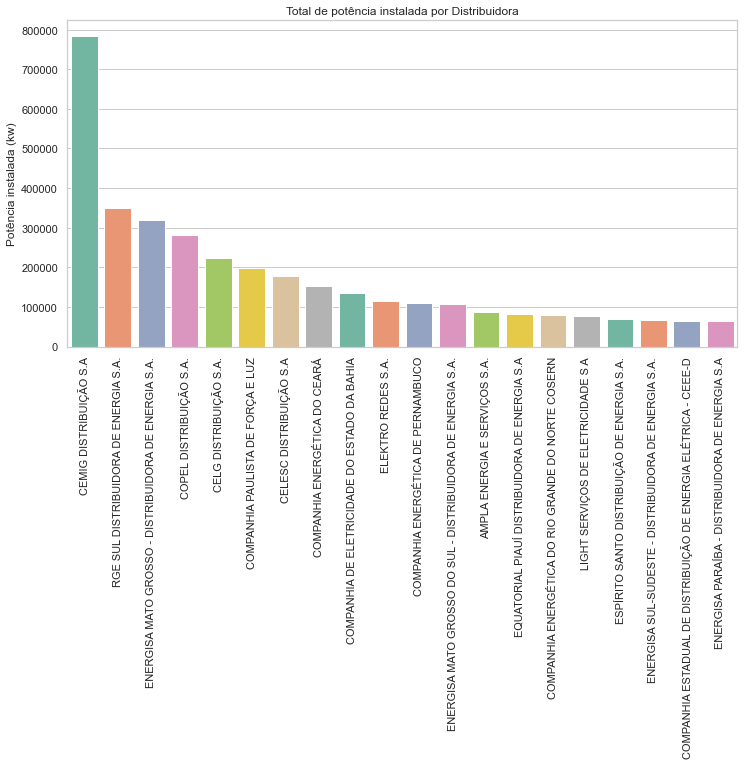

In [40]:
# Plotando um countplot com o total de potência instalada por distribudora.

plt.figure(figsize = (12, 6))
plt.title('Total de potência instalada por Distribuidora')
ax = sns.barplot(x = 'nomDistribuidora', y = 'mdaPotenciaInstaladaKW', data = dfDistrT20, palette = 'Set2')
ax.tick_params(axis = 'x', rotation = 90)
plt.xlabel('')
plt.ylabel('Potência instalada (kw)')
plt.show()

Podemos ver que a CEMIG, distribuidora que atende à MG, é responsável tanto pelo maior número de empreendimentos conectados à rede quanto à potência instalada.

## Conclusão

Existem muitas possibilidades quando se trata de ciência de dados. Outras análises poderiam ser feitas se juntarmos por exemplo, dados demográficos dos estados e municípios, poderíamos fazer uma análise levando em conta a população, o número de residências e comércios. Poderíamos utilizar de outros tipos de gráficos, como heatmaps e eventualmente utilizar machine learning para tentar prever um valor de potência instalada. 

Lembrando que, esses dados são de novembro/2020 e o trabalho foi realizado em agosto/2021, portanto, dado ao crescimento do setor principalmente de energia solar, algum desses valores tanto de potência instalada quanto de número de empreendimentos podem ter sofrido alterações.

Enfim, o Brasil tem enorme potencial para aproveitamento da irradiação solar que, em tempos de crises hídricas, pode fazer muita diferença.